In [1]:
import parmed as pmd
import numpy as np
import os
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from adjustText import adjust_text
import plotting

# Dihedral parameter comparison.

Let's iterate through the structure and look at the parameters, one-by-one. This seems to be the only reliable way to compare apples with apples.

First, find the unique set of four atoms, by atom name, in a single alpha-cyclodextrin residue. Then we'll look at the dihedrals applied to these 4 atom sets. Thankfully, when we query ParmEd for a mask of four atoms, ParmEd looks for the atoms in either ordering (e.g., `a-b-c-d` and `d-c-b-a`), which are the same dihedral, but may be listed separately.

In [50]:
def energy(periodicities, phases, heights):
    heights = np.asarray(heights)
    periodicities = np.asarray(periodicities)
    phases = np.asarray(phases)
    return [(1/2) * heights * (1 + np.cos(periodicities * theta - phases)) for theta in np.linspace(0, 2 * np.pi, 100)]

In [51]:
smirnoff = energy(1, 0, 0.25)
bgbg = energy([1, 3], [0, 0], [0, 0.16])

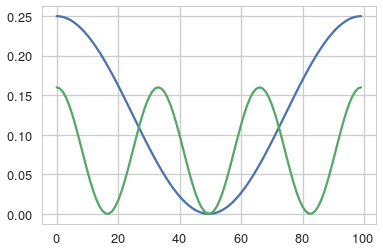

In [57]:
plt.plot(smirnoff)
plt.plot(np.sum(bgbg, axis=1))

In [58]:
# CHeck O1-C2-C2-O2
smirnoff = energy([1, 2, 3], [0, 0, 0], [0, 1.18, 0.14])
bg2bg2 = energy([1, 2, 3], [0, 0, 0], [0.02, 0.00, 1.01])

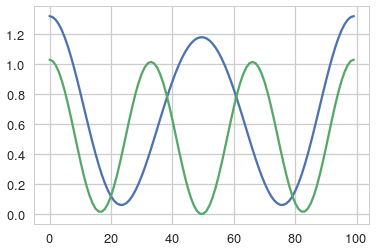

In [59]:
plt.plot(np.sum(smirnoff, axis=1))
plt.plot(np.sum(bg2bg2, axis=1))